# Complejidad en modelos de ML

Muchas veces, podemos creer que un modelo mas sofisticado siempre será la solución adecuada para cualquier problema.

¿Esto siempre será cierto?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, train_test_split

Generemos un conunto de datos sintéticos y probemos ajustar el mismo modelo de regresión polinomial, con distinto grado de complejidad

In [5]:
np.random.seed(0)
n_samples = 300
X = np.sort(np.random.rand(n_samples))
y = np.sin(4 * np.pi * X) + np.random.randn(n_samples) * 0.1 + np.linspace(0.0, 5.0, num=300)

X = X[:, np.newaxis]

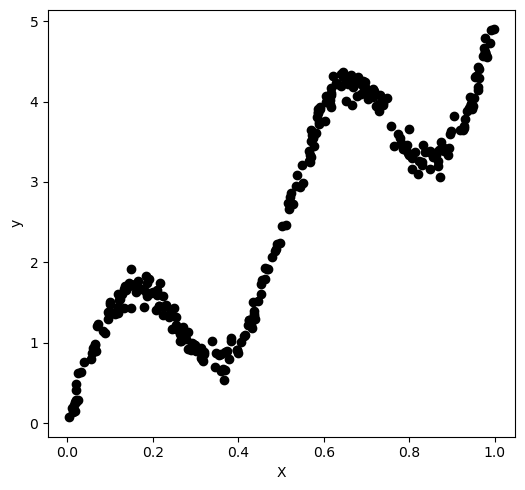

In [9]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)

ax.scatter(X, y, color='black', label='Datos')
ax.set_xlabel('X')
ax.set_ylabel('y')

plt.tight_layout()
plt.show()


Ahora dividiremos los datos para entrenar el modelo y tendremos un conjunto de datos de prueba

El conjunto de prueba serán datos nunca antes vistos por el modelo para probar posteriormente que tan bueno es con datos que nunca ha visto

In [12]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

Probemos como se ajusta el modelo a los datos de entrenamiento

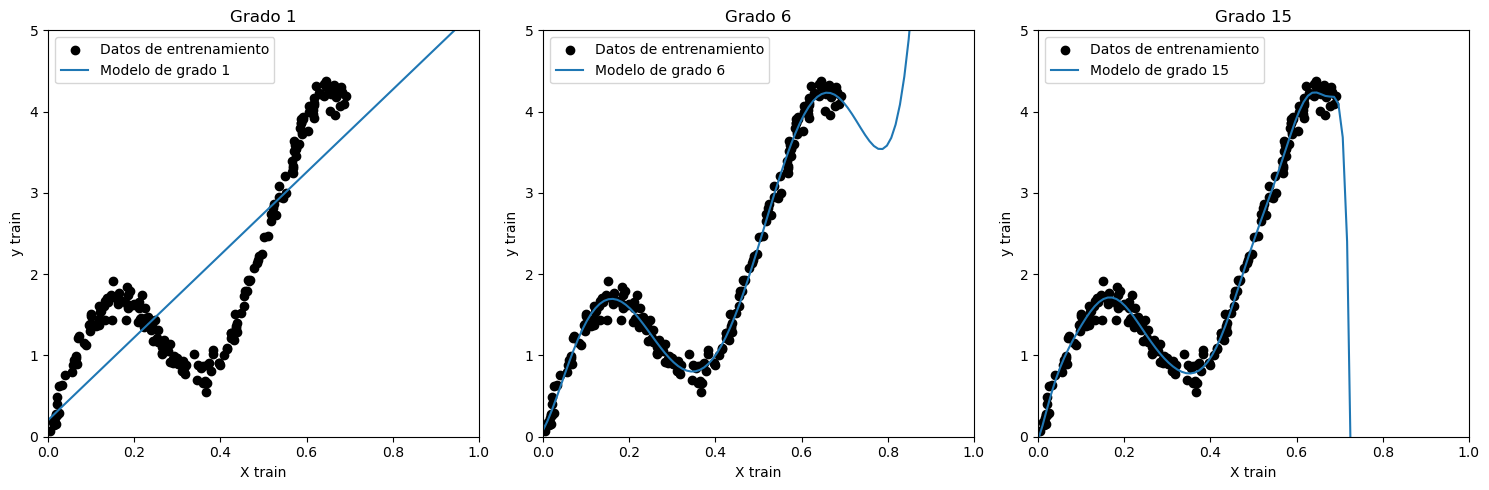

In [15]:
# Ajustar modelos polinomiales de diferentes grados
degrees = [1, 6, 15]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, 3, i + 1)
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X_train)

    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    # Predicción
    X_plot = np.linspace(0, 1, 100)[:, np.newaxis]
    X_plot_poly = polynomial_features.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    
    # Gráfica
    ax.scatter(X_train, y_train, color='black', label='Datos de entrenamiento')
    ax.plot(X_plot, y_plot, label='Modelo de grado {}'.format(degree))
    
    # Configurar límites de los ejes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 5)
    
    ax.set_xlabel('X train')
    ax.set_ylabel('y train')
    ax.legend()
    ax.set_title('Grado {}'.format(degree))

plt.tight_layout()
plt.show()


Ahora revisemos con datos nunca antes vistos

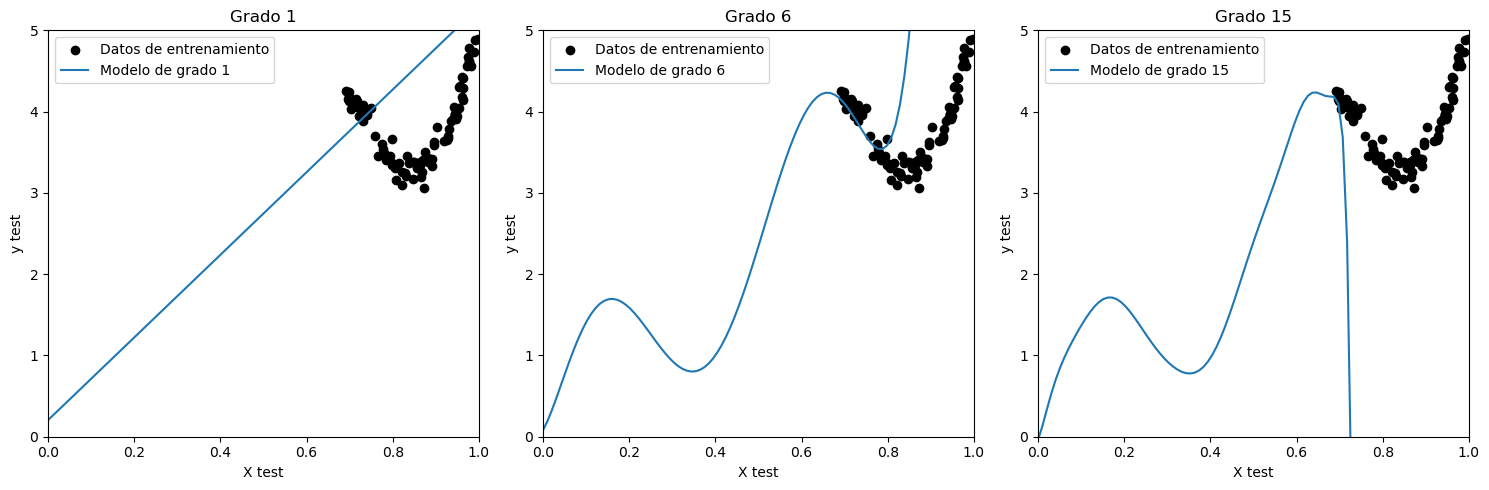

In [18]:
# Ajustar modelos polinomiales de diferentes grados
degrees = [1, 6, 15]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, 3, i + 1)
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X_train)

    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    # Predicción
    X_plot = np.linspace(0, 1, 100)[:, np.newaxis]
    X_plot_poly = polynomial_features.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    
    # Gráfica
    ax.scatter(X_test, y_test, color='black', label='Datos de entrenamiento')
    ax.plot(X_plot, y_plot, label='Modelo de grado {}'.format(degree))
    
    # Configurar límites de los ejes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 5)
    
    ax.set_xlabel('X test')
    ax.set_ylabel('y test')
    ax.legend()
    ax.set_title('Grado {}'.format(degree))

plt.tight_layout()
plt.show()


¿Qué modelo es el que mejor se ajusta a los datos?